In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Lesson 0 &ndash; Introduction

In this part, we will explore how to use machine learning skills to analyze text information.

## Learning Objectives
1. Preparing text data
    - reading a text file
    - retrieving abstracts from PubMed using PMID information
    - building a dataframe
2. Text data wrangling & processing
    - tokenization & lemmitization
    - stemming
    - stopword removal
3. Exploratory analysis of text data
    - word frequencies by uni-, bi-, and trigrams
    - frequency distribution
4. Parts of Speech Tagging
    - understanding language syntax and structure
    - shallow parsing or chunking
    - constituency parsing
    - dependency parsing
    - named entity recognition
5. Feature representation
    - bag-of-words 
    - TF-IDF
6. Predictive analysis of text data
    - logistic regression
    - naive Bayes

## Case Scenario
You are a physician who sees a patient with .

## Description of Dataset
The data is a publicly available, annotated dataset that was previously curated manually by systematic reviewers.  
*Sources: Cohen AM et al. Reducing Workload in Systematic Review Preparation Using Automated Citation Classification.* JAMIA *2006;13(2):206-219. Downloaded from https://dmice.ohsu.edu/cohenaa/systematic-drug-class-review-data.html on March 26, 2020*

Systematic review decisions for abstracts and articles are included for these fifteen drug review topics:  
- ACE inhibitors (ACEIs)  
- Attention-deficit hyperactivity disorder (ADHD)  
- Antihistamines
- Atypical antipsychotics  
- Beta blockers (BBs)
- Calcium challen blockers (CCBs)  
- Estrogens  
- NSAIDS  
- Opioids  
- Oral hypoglycemics (OHGs)  
- Proton pump inhibitors (PPIs)
- Skeletal muscle relaxants  
- Statins  
- Triptans  
- Urinary incontinence  

The data file has five columns: topics, EndNote ID, PubMed ID (PMID), abstract triage status, and article Triage Status.  
Due to the computational capacity of a Python library module we will later use, I cut the data down to hold only 10,000 artles, to include the first nine topics (ACEIs to Opioids) only.

The original file is in tab-separated value (.tsv) format. We can convert it into txt file using Excel.

The converted txt file looks like this. (I converted the tsv file to txt file for you.)
  
  
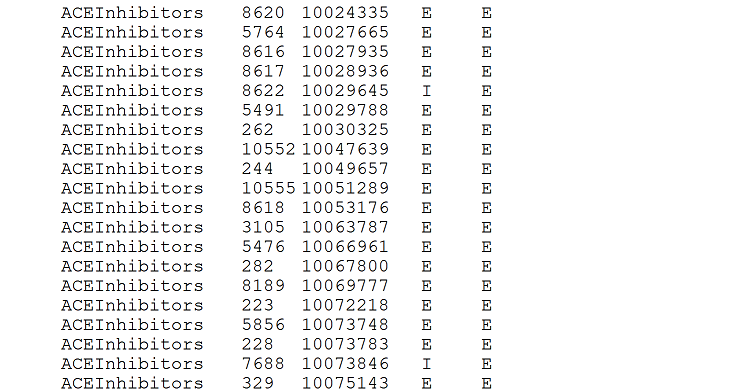

# Lesson 1 &ndash; Preparing Dataset

We are interested in extracting topics, PMID, and exclusion/inclusion decision, which correspond to the first, third, and fourth column of the txt file.  
  
Take a close look at each line. Each line begins with topics which are strings, followed by a tab, then EndNote IDs which are integers. Again a tab followed by PMIDs, which are integers, and then come abstract triage decisions and full-article triage decisions which are represented by single upper-case characters, separated by a tab. We can express each line in a *pythonic way* as below:  
  
`"topics" + "\t" + "EndNote ID" + "\t" + "PMID" + "\t" + "abstract triage decision" + "\t" + "full-article triage decision"`  
  
First, read the file line by line

In [2]:
import os

os.getcwd()
path='\\Users\\silve\OneDrive\\UNC\\Mostafa\\ENABLE\\SR dataset'
os.chdir(path)

Each line in the file has five elements deliminated by tabs.

We will extract topics (1st element), PMIDs (3rd element), and abstract triage decisions (4th element).  
  
  
We will make a dictionary 'data', whose keys are topics and whose values are (PMID, triage decision) tuples, to construct the information we have retrieved.

In [3]:
file = open('epc-ir_clean_10k.txt')

data = {}

for line in file:
    line = line.strip()
    line_elements = line.split('\t') # separate five elements in each line.
    topic = line_elements[0] # 'Topic' is the first element in each line.
    pmid = line_elements[2] # 'PMID' is the third element in each line.
    decision = line_elements[3] # 'abstract triage decision' is the fourth element in each line
    values = pmid,decision # values are the tuples whose elements are pmid and decision.
    data.setdefault(topic,{}).setdefault(pmid,decision) # see below

print(data)

file.close()

{'ACEInhibitors': {'10024335': 'E', '10027665': 'E', '10027935': 'E', '10028936': 'E', '10029645': 'I', '10029788': 'E', '10030325': 'E', '10047639': 'E', '10049657': 'E', '10051289': 'E', '10053176': 'E', '10063787': 'E', '10066961': 'E', '10067800': 'E', '10069777': 'E', '10072218': 'E', '10073748': 'E', '10073783': 'E', '10073846': 'I', '10075143': 'E', '10075388': 'E', '10077374': 'E', '10078088': 'I', '10080414': 'E', '10080455': 'E', '10080457': 'I', '10082500': 'E', '10083055': 'E', '10086852': 'E', '10088066': 'I', '10089936': 'E', '10090111': 'E', '10090348': 'E', '10090351': 'E', '10091486': 'E', '10091816': 'E', '10091821': 'E', '10093076': 'E', '10093769': 'E', '10095796': 'E', '10097934': 'E', '10099033': 'E', '10099034': 'E', '10099064': 'E', '10099075': 'E', '10099910': 'I', '10100063': 'E', '10100064': 'E', '10100068': 'E', '10100083': 'E', '10100105': 'E', '10130617': 'E', '10150320': 'E', '10150325': 'E', '10155301': 'E', '10164060': 'E', '10169388': 'E', '10170450': 

`setdefault()` function returns value if the key is in the dictionary; if not, inserts key with the value of default and returns default.  
In our code `data.setdefault(pmid,[]).append((topic,decision))`, `setdefault()` function  keeps appending values if their keys are already there in the 'data' dictionary. When faced with a new key, the function creates a new empty dictionary that is ready to receive a new list which is comprised of tuples ('topic','decision')  
  
As you can see, the article '10024335' was used for two reviews, "ACEInbihitors" and "Statins." `setdefault()` is such a powerful tool to retrieve duplicated record that it does not allow to lose information used in different domains.  
  
Now we have a data dictionary whose keys are PMIDs and values are tuples of topics and trage decisions.    
With this dictionary, we can easily navigate topics with PMIDs at hand.  

Now let's create a data frame built for the systematic review of 'ACEIhibitors'.

----
## Building a data frame using pandas library

Credit: this module was adopted from Dr. Copra's INLS 570 class at UNC-CH

Before we further use our data, let me talk about Pandas library and data frame.  
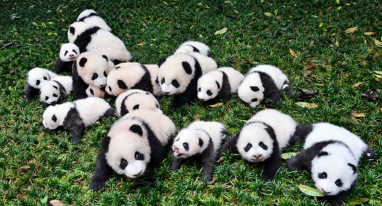  
  
In order to use data frame, you will first need to run the code in the cell below.  

In [4]:
import pandas as pd
from pandas import DataFrame

A data frame is a tabular data structure, like a spreadsheet.  
It has ordered collection of columns, and each column can be a different data type. It also has row and column indexes (in most cases).  
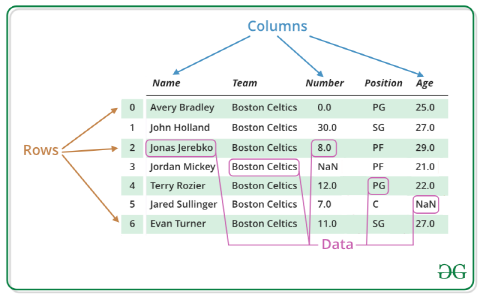

### Create a DataFrame from a dict of equal-length lists  
* We can create a DataFrame using a Python dictionary of equal-length lists.

* For example:


In [5]:
course_list = ['inls285', 'inls285', 'inls382', 'inls382', 'inls523', 'inls523']
semester_list = ['s13', 's14', 's13', 's14', 's13', 's14']
enrollment_list = [31, 58, 26, 46, 19, 28]

d = {'course': course_list, 'semester': semester_list, 'enrollment': enrollment_list}
df= DataFrame(d)
print(df)

    course semester  enrollment
0  inls285      s13          31
1  inls285      s14          58
2  inls382      s13          26
3  inls382      s14          46
4  inls523      s13          19
5  inls523      s14          28


When we use ``print(df)``, Jupyter notebooks display the contents of the **Series** as plain text (as shown above).  
  
* Series are a one-dimensional data structure that pandas provides to us.

* A series contains an array of data &ndash; a numpy ndarray in fact.

* A series also has an associated array of data labels called its index.

However, you can put the name of a pandas data structure on a line by itself **at the end of a Jupyter notebook cell** and when you run the code, it will display the the data structure using formatted output:

In [6]:
df= DataFrame(d)
df

,course,semester,enrollment
0,inls285,s13,31
1,inls285,s14,58
2,inls382,s13,26
3,inls382,s14,46
4,inls523,s13,19
5,inls523,s14,28


### Creating a DataFrame with a dict of dicts

A dict of dicts will create a DF with outer dictkeys as the columns and inner dictskeys as row indices

In [7]:
d2 = {'unc': {2012: 4.1, 2013: 4.3, 2014: 4.5}, 'duke': {2012: 3.8, 2013: 3.8, 2014: 4.1}}
df2= DataFrame(d2)
df2

,unc,duke
2012,4.1,3.8
2013,4.3,3.8
2014,4.5,4.1


In [8]:
print(df.columns)

Index(['course', 'semester', 'enrollment'], dtype='object')


In [9]:
print(df.index)

RangeIndex(start=0, stop=6, step=1)


### Retrieving Columns

We can retrieve columns by dict-like notation, or by attribute. 

In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
print(df)

    course semester  enrollment
0  inls285      s13          31
1  inls285      s14          58
2  inls382      s13          26
3  inls382      s14          46
4  inls523      s13          19
5  inls523      s14          28


Columns are retrieved as a Series

In [12]:
s = df['course']
print(s)

0    inls285
1    inls285
2    inls382
3    inls382
4    inls523
5    inls523
Name: course, dtype: object


DF columns can be extracted and operated on as either Series or numpyarrays

In [13]:
type(s)

pandas.core.series.Series

In [14]:
a = df.course.values # same as df['course'].values
type(a)

numpy.ndarray

In [15]:
s2 = df.course # retrieve the column 'course' in the data frame 'df'
print(s2)

0    inls285
1    inls285
2    inls382
3    inls382
4    inls523
5    inls523
Name: course, dtype: object


Once you retrieved a column, you can use it like a collection

In [16]:
print(df.enrollment)

0    31
1    58
2    26
3    46
4    19
5    28
Name: enrollment, dtype: int64


The data type of a column of data frame is pandas Series

In [17]:
type(df.enrollment)

pandas.core.series.Series

In [18]:
for n in df.enrollment:
    print (n)

31
58
26
46
19
28


### Data Frame Index

Data frames can also have a customized index

In [19]:
d = {'course': ['inls285', 'inls285', 'inls382', 'inls382', 'inls523', 'inls523'],
     'semester': ['s13', 's14', 's13', 's14', 's13', 's14'],
     'enrollment': [31, 58, 26, 46, 19, 28]}
print(d)

{'course': ['inls285', 'inls285', 'inls382', 'inls382', 'inls523', 'inls523'], 'semester': ['s13', 's14', 's13', 's14', 's13', 's14'], 'enrollment': [31, 58, 26, 46, 19, 28]}


In [20]:
df= DataFrame(d, index=['c1234', 'c2345', 'c8822', 'c7654', 'c5512', 'c4321'])
print(df)

        course semester  enrollment
c1234  inls285      s13          31
c2345  inls285      s14          58
c8822  inls382      s13          26
c7654  inls382      s14          46
c5512  inls523      s13          19
c4321  inls523      s14          28


### Retrieve Rows using df.loc

Rows of a data frame can be retrieved using the .loc() method.  
Rows are retrieved as a Pandas Series whose index is the column of the DF.

In [21]:
print(df)

        course semester  enrollment
c1234  inls285      s13          31
c2345  inls285      s14          58
c8822  inls382      s13          26
c7654  inls382      s14          46
c5512  inls523      s13          19
c4321  inls523      s14          28


In [22]:
s = df.loc['c7654']
print(s)

course        inls382
semester          s14
enrollment         46
Name: c7654, dtype: object


The data type of a row of data frame is pandas Series.

In [23]:
type(s)

pandas.core.series.Series

In [24]:
print(s.values)

['inls382' 's14' 46]


In [25]:
print(s.index)

Index(['course', 'semester', 'enrollment'], dtype='object')


### Simple aggregation functions

You can use the following functions to aggregate by columns or rows of data frame.  
  
Here are a few commonly used ones:

* mean()
* sum()
* median()
* std() -- returns the standard deviation
* var() -- returns the variance
* amin() -- returns the minimum
* amax() -- returns the maximum

Calculate the sum of the `enrollment` column of df.

In [26]:
df['enrollment'].sum()

208

----
### <font color=blue> Exercise 1 &ndash; DataFrame practice </font>

* Create a DataFrame with the following play count data.
* The index for the DF should be the artists' names. 

<i></i>     | Aug | Sept| Oct
------------|:---:|:---:|:---:
David Bowie | 571 | 623 | 409
The Beatles | 725 | 518 | 822
New Order   | 274 | 492 | 368


* After creating the DF:
  * Extract the Sept column and compute the total # of plays

### Adding Columnts to a DataFrame

New columns can be added to a DataFrame. Below, a new column `tmp` is added to the DataFrame `df`. And a list is used to add data to the new column in the DataFrame.

In [27]:
df

,course,semester,enrollment
c1234,inls285,s13,31
c2345,inls285,s14,58
c8822,inls382,s13,26
c7654,inls382,s14,46
c5512,inls523,s13,19
c4321,inls523,s14,28


In [28]:
df['tmp'] = [1, 3, 5, 7, 8, 9]
df

,course,semester,enrollment,tmp
c1234,inls285,s13,31,1
c2345,inls285,s14,58,3
c8822,inls382,s13,26,5
c7654,inls382,s14,46,7
c5512,inls523,s13,19,8
c4321,inls523,s14,28,9


### Indexing parts of a DataFrame

There are several ways to refer to a specific cell (or element) in a DataFrame.


In [29]:
df

,course,semester,enrollment,tmp
c1234,inls285,s13,31,1
c2345,inls285,s14,58,3
c8822,inls382,s13,26,5
c7654,inls382,s14,46,7
c5512,inls523,s13,19,8
c4321,inls523,s14,28,9


The first method uses a dot to separate the name of the data frame, then the name of the column, and then the name of the row:

In [30]:
df.course.c8822

'inls382'

The second method uses brackets to separate the column and row names:

In [31]:
df['course']['c8822']

'inls382'

You can also mix the two methods like this:

In [32]:
df.course['c8822']

'inls382'

You can also use the position number in a bracket for the **rows**:

In [33]:
df['course'][2]

'inls382'

But the position number only works for the rows, **not the columns**:

(the example below does **not** work and generates a KeyError)

In [34]:
df[0][2]

KeyError: 0

### More complex indexing with DataFrames

Next, we will look at some more complex ways that we can refer to parts of a DataFrame.  
  
We know that we can retrieve a column of the DataFrame like this:


In [35]:
df['course']

c1234    inls285
c2345    inls285
c8822    inls382
c7654    inls382
c5512    inls523
c4321    inls523
Name: course, dtype: object

We can also retrieve multiple columns in the order specified by putting a list of column names in brackets:

In [36]:
df[['course','semester']]

,course,semester
c1234,inls285,s13
c2345,inls285,s14
c8822,inls382,s13
c7654,inls382,s14
c5512,inls523,s13
c4321,inls523,s14


We can also take a slice of **rows**.  

In [37]:
df[:2]

,course,semester,enrollment,tmp
c1234,inls285,s13,31,1
c2345,inls285,s14,58,3


And we can use boolean indexing to selectively retrieve rows.

In [38]:
df[df['enrollment']>40]

,course,semester,enrollment,tmp
c2345,inls285,s14,58,3
c7654,inls382,s14,46,7


### Sorting by row or column index

Recall that DataFrame rows and columns **do** have an order.

This means that we can (1) re-order and (2) sort the rows and columns of a DataFrame.

Let's look at an example:

In [39]:
df

,course,semester,enrollment,tmp
c1234,inls285,s13,31,1
c2345,inls285,s14,58,3
c8822,inls382,s13,26,5
c7654,inls382,s14,46,7
c5512,inls523,s13,19,8
c4321,inls523,s14,28,9


In the example below, we use .loc() to specify an order for both the rows ``['c2345', 'c7654','c4321','c1234','c8822','c5512']`` and for the columns ``['semester','course','enrollment']``.

The result is a new DataFrame with the rows and columns in the order specified:

In [40]:
df3 = df.loc[['c2345', 'c7654','c4321','c1234','c8822','c5512'],
             ['semester','course','enrollment']]
df3

,semester,course,enrollment
c2345,s14,inls285,58
c7654,s14,inls382,46
c4321,s14,inls523,28
c1234,s13,inls285,31
c8822,s13,inls382,26
c5512,s13,inls523,19


In [41]:
type(df3)

pandas.core.frame.DataFrame

We can sort the DataFrame rows or columns using ``.sort_index()``.  
If we just call ``.sort_index()`` on the DataFrame, it will sort by **rows**:

In [42]:
df3.sort_index()

,semester,course,enrollment
c1234,s13,inls285,31
c2345,s14,inls285,58
c4321,s14,inls523,28
c5512,s13,inls523,19
c7654,s14,inls382,46
c8822,s13,inls382,26


We can sort by **columns** by passing a parameter ``axis=1``:

In [43]:
df4 = df3.sort_index(axis=1)
df4

,course,enrollment,semester
c2345,inls285,58,s14
c7654,inls382,46,s14
c4321,inls523,28,s14
c1234,inls285,31,s13
c8822,inls382,26,s13
c5512,inls523,19,s13


If you don't specify an axis, the default for ``.sort_index()`` is to sort by rows.  However, you can also sort by rows by specifying ``axis=0``:

In [44]:
df2.sort_index(axis=0)

,unc,duke
2012,4.1,3.8
2013,4.3,3.8
2014,4.5,4.1


### Summarizing Data (Descriptive Statistics)

Pandas objects such as Series and DataFrame support many common mathematical operations to summarize data.  
  
For example:

* count

* sum

* mix, max

* mean, median, std


A nice feature of these operations is that pandas typically handles missing data in an elegant way

Method | Description
:--------|------
`count`  | Number of non-NA values
`describe` | Compute set of summary statistics for Series or each DataFrame column
`min`, `max` | Compute minimum and maximum values
`argmin`, `argmax` | Compute index locations (integers) at which minimum or maximum value obtained, respectively
`idxmin`, `idxmax` | Compute index values at which minimum or maximum value obtained, respectively
`quantile` | Compute sample quantile ranging from 0 to 1
`sum` | Sum of values
`mean` | Mean of values
`median` | arithmetic median (50% quantile) of values
`mad` | Mean absolute deviation from mean value
`var` | Sample variance of values
`std` | Sample standard deviation of values
`skew` | Saple skewness (3rd moment) of values
`kurt` | Sample kurtosis (4th moment) of values
`cumsum` | Cumulative sum of values
`cummin`, `cummax` | Cumulative minimum or maximum of values, respectively
`cumprod` | Cumulative product of values
`diff` | Compute 1st arithmetic difference (useful for time series)
`pct_change` | Compute percent changes

let's look at a few examples:

In [45]:
d5 = {'unc': {2012: 4.1, 2013: 4.3, 2014: 4.5},
     'duke': {2012: 3.8, 2013: 3.8, 2014: 4.1},
     'ncstate': {2013: 3.8, 2014: 4.3}}
df5= DataFrame(d5)
df5

,unc,duke,ncstate
2012,4.1,3.8,NaN
2013,4.3,3.8,3.8
2014,4.5,4.1,4.3


We can compute the sum of the values in the 'enrollment" column like this:

In [46]:
df5['unc'].sum()

12.899999999999999

Or like this:

In [47]:
df5.unc.sum()

12.899999999999999

But wait, why isn't the sum 12.9?  
Let's try something simpler

In [52]:
0.1 + 0.2

0.30000000000000004

Huh, that's strange. How about...

In [53]:
0.1 + 0.1 + 0.1 == 0.3

False

#### Floating Point Numbers

Python, along with most other high-level programming languages and the chips on your computer, represent floating-point numbers as base 2 (binary) fractions.  This is similar to scientific notation, except in base 2 instead of base 10.


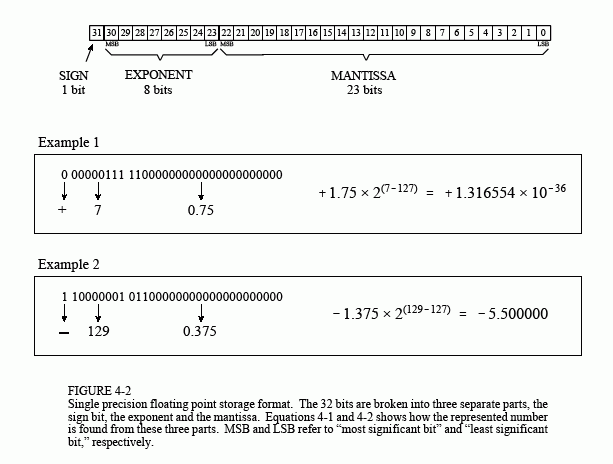
(from: http://www.dspguide.com/ch4/3.htm)

* Decimal fraction:   1.834 = 1 + 8/10 + 3/100 + 4/1000

* Binary fraction:  1.011 = 1 + 0/2 + 1/4 + 1/8 

* Exponent bias:  subtract 127 from exponent  

* Python, along with most other programming languages and the chips on your computer, represent floating-point numbers as base 2 (binary) fractions.

* Unfortunately, many decimal fractions cannot be represented exactly as binary fractions.

* Thus, the decimal FP numbers we enter are stored as binary FP numbers that are very close approximations

* Actually, we have this problem with decimal fractions also.

* Consider 1/3 in decimal:
  * 0.3,    0.333,    0.3333333333333333
  * all are approximations

* With binary fractions, the decimal value 0.1 has the same problem.

#### Let's go back to pandas DataFrame

In order to compute the sum of a **row**, we need to use .loc().

``df.loc['c2345']`` returns a **Series** that is the data from the 'c2345' row.  Then it calls ``.sum()`` to compute the sum of the Series.

In [48]:
df5.loc[2012].sum()

7.8999999999999995

In [49]:
type(df5.loc[2012])

pandas.core.series.Series

--------
### <font color=blue> Exercise 2 &ndash; Sum rows and columns of a DataFrame <font>

* Create a DataFrame with the following play count data (start with your solution to Ex 1).
* The index for the DF should be the artists' names. 

<i></i>     | Aug | Sept| Oct
------------|:---:|:---:|:---:
David Bowie | 571 | 623 | 409
The Beatles | 725 | 518 | 822
New Order   | 274 | 492 | 368


* After creating the DF:
  * Compute the total # of plays for the Sept column
  * Compute the total # of plays for the 'David Bowie' row
    * (Hint: use df.loc)

### Sorting a DataFrame

DataFrames can be sorted by:
* the row index
* the column index
* the values in a column

Let's look at an example DataFrame:

In [50]:
df6= DataFrame({'cb': [6, 2, 8, 4], 'ca': [7, 3, 1, 5]},
              index=['id', 'ia', 'ib', 'ic'])
df6

,cb,ca
id,6,7
ia,2,3
ib,8,1
ic,4,5


As said earlier, We can sort by the **row index** using ``.sort_index()`` with no parameters.
The default is to sort by the row index:

In [51]:
df6.sort_index()

,cb,ca
ia,2,3
ib,8,1
ic,4,5
id,6,7


We can pass the parameter ``axis=1`` to sort by the **column index**.

We can also pass the parameter ``ascending = False`` to do the sort in reverse order (i.e. 'z' to 'a'):

In [54]:
df6.sort_index(axis=1, ascending=False)

,cb,ca
id,6,7
ia,2,3
ib,8,1
ic,4,5


In order to sort a DataFrame based on the **values in a column**, we can use ``.sort_values()``.

In [55]:
df6

,cb,ca
id,6,7
ia,2,3
ib,8,1
ic,4,5


To use ``.sort_values()`` we pass an argument that indicates the column index that we would like to sort by:

In [56]:
df6.sort_values(by='cb')

,cb,ca
ia,2,3
ic,4,5
id,6,7
ib,8,1


In [57]:
df6.sort_values(by='ca')

,cb,ca
ib,8,1
ia,2,3
ic,4,5
id,6,7


We can also sort a DataFrame based on the **values in mulitple columns** by passing a list of the column indicies:

The example below will first sort on column 'ca'.  If any of the values in 'ca' are the same, it will then use column 'cb' to decide the order:

In [58]:
df7 = DataFrame({'a': [5, 7, 1, 1], 'b': [2, 4, 8, 6]})
df7

,a,b
0,5,2
1,7,4
2,1,8
3,1,6


In [59]:
df7.sort_values(by=['a','b'])

,a,b
3,1,6
2,1,8
0,5,2
1,7,4


---------------
### <font color=blue> Exercise 3 &ndash; Sorting DataFrames <font>

* 1 - Create the DataFrame with the same "play count" data that we have used in the previous exercise:

<i></i>     | Aug | Sept| Oct
------------|:---:|:---:|:---:
David Bowie | 571 | 623 | 409
The Beatles | 725 | 518 | 822
New Order   | 274 | 492 | 368


* 2 - Output a version of the DataFrame that is sorted based on the artist name (the row index).

* 3 - Output a version of the DataFrame that is sorted based on the play counts for November.

So far, we have learned a basic ideas of DataFrame using pandas library

-------------
#### Let's go back to our dataset  


In [60]:
print(data)

{'ACEInhibitors': {'10024335': 'E', '10027665': 'E', '10027935': 'E', '10028936': 'E', '10029645': 'I', '10029788': 'E', '10030325': 'E', '10047639': 'E', '10049657': 'E', '10051289': 'E', '10053176': 'E', '10063787': 'E', '10066961': 'E', '10067800': 'E', '10069777': 'E', '10072218': 'E', '10073748': 'E', '10073783': 'E', '10073846': 'I', '10075143': 'E', '10075388': 'E', '10077374': 'E', '10078088': 'I', '10080414': 'E', '10080455': 'E', '10080457': 'I', '10082500': 'E', '10083055': 'E', '10086852': 'E', '10088066': 'I', '10089936': 'E', '10090111': 'E', '10090348': 'E', '10090351': 'E', '10091486': 'E', '10091816': 'E', '10091821': 'E', '10093076': 'E', '10093769': 'E', '10095796': 'E', '10097934': 'E', '10099033': 'E', '10099034': 'E', '10099064': 'E', '10099075': 'E', '10099910': 'I', '10100063': 'E', '10100064': 'E', '10100068': 'E', '10100083': 'E', '10100105': 'E', '10130617': 'E', '10150320': 'E', '10150325': 'E', '10155301': 'E', '10164060': 'E', '10169388': 'E', '10170450': 

The data frame will have columns of PMID, abstract text, and triage decisions.  
  
The index of the dataframe should be PMIDs. First we will create an empy data frame with four columns--topic, PMID, triage decision, and abstract.

In [61]:
col_names = ['topic','pmid','decision']
df = pd.DataFrame(columns = col_names)

To append to the end of a DataFrame, use pandas.DataFrame.append() on a Pandas Series object. Construct the Pandas Series object using a dictionary that maps a column to a value and the name of the row to add.

In [62]:
# iterate over every topic, i.e., 'ACEInhitors',...,'Opioids'
for topic in data: 
    
    # extract the dictionary contained in each topic, i.e., {'10024335': 'E', '10027665': 'E',...}
    dict_by_topic = data[topic] 
    
    #  iterate PMIDs (keys) in the sub-dictionary, i.e.,., '10024335'...
    for pmid in dict_by_topic: 
        
        # make a new dictionary with respect to the PMID. 
        # This data will become rows that will be inserted into the empty df.
        value = {'topic':topic, 'pmid':pmid, 'decision':dict_by_topic[pmid]} 
        
        # transform the 'value' dictionary to Pandas series.
        row = pd.Series(value)
        
        # append the series to the empty df.
        df = df.append(row, ignore_index=True)

In [63]:
df.head()

,topic,pmid,decision
0,ACEInhibitors,10024335,E
1,ACEInhibitors,10027665,E
2,ACEInhibitors,10027935,E
3,ACEInhibitors,10028936,E
4,ACEInhibitors,10029645,I


Now, We will add a new column for abstract texts.  
To to this, we have to retrieve PubMed abstracts using the BioPython library.

------
## Getting abstracts from a list of PMID

credit: https://stackoverflow.com/questions/47559098/is-there-any-way-to-get-abstracts-for-a-given-list-of-pubmed-ids

#### BioPython library
Using BioPython library, you can extract the abstracts of given PMID. You can give the joined list of Pubmed IDs to Entrez.efetch and that will perform a single URL lookup, creating the **dictionaries** whose keys are PMID and values are abstract strings. 

If this is the first time you use BioPython library, you have to install the module with the following code. You do not have to install BioPython if you had already installed it before.

In [ ]:
pip install biopython

Then import Entrez from the Bio library.

In [64]:
from Bio import Entrez

To make use of Entrez, we first have to have a list of PMIDs. In this list, PMIDs that appear multiple times throught the data do not need to be repeated.

In [65]:
# make an empty list that will hold PMIDs
pmids_list = []

# iterate over the key of the 'data' dictionary (i.e., topics) we built before.
for topic in data:
    
    # iterate over the PMIDs that are contained in the topics sub-dictionaries.
    for pmid in data[topic]:
        
        # The PMIDs in the 'data' dictionaries are strings. 
        # To make them recognized by the Entrez module, we have to transform PMIDs into integers.
        pmid = int(pmid)
        
        # append any new PMIDs to 'pmids_list'
        if pmid not in pmids_list:
            pmids_list.append(pmid)

In [66]:
len(pmids_list)

8914

There are 8914 unique PMIDs in the data.  
  
Now, we have a list of PMIDs. We will pass the list to Entrez module.  
You do not have to know all the details of the following code, but you can copy and paste this code whenever you need.

In [67]:
abstract_dict = {}
without_abstract = []

handle = Entrez.efetch(db="pubmed", id=','.join(map(str, pmids_list)),
                       rettype="xml", retmode="text")
records = Entrez.read(handle)

for pubmed_article in records['PubmedArticle']:
    pmid = int(str(pubmed_article['MedlineCitation']['PMID']))
    article = pubmed_article['MedlineCitation']['Article']
    if 'Abstract' in article:
        abstract = article['Abstract']['AbstractText'][0]
        abstract_dict[pmid] = abstract
    else:
       without_abstract.append(pmid)

The keys of the 'abstract_dict' dictionary are PMIDs and their values are the text of abstracts corresponding to that PMID. For example, let's look at the abstract text of the PMID 8041685.

In [68]:
abstract_dict[8041685]

'Diagnosis of myofascial pain syndrome may become less challenging as clinical criteria become better defined. The mechanisms are not well known, and the syndrome occurs in a wide variety of settings. Trigger points with referred pain are the most common feature. Treatment consists of physical modalities (spray-and-stretch techniques and trigger point block) combined with a program of graded muscle stretching and strengthening. Early, aggressive treatment yields an improved prognosis.'

Now, We will attach the abstract text to a new column of the existing data frame df.  

In [69]:
# make an empty column that will contain the texts of abstracts. 
# The columns is a Pandas series.
abstract_col = pd.Series([])

# In the df data frame we made before, we will iterate over PMIDs in the df one by one.
for i in range(len(df)):
    
    # We will extract PMIDs which are located in the second column of df.
    pmid = df.iloc[i,1]
    
    # Currently the PMIDs are in string form. Transform them into integers.
    pmid = int(pmid)
    
    # There are some articles whose abstracts are not provided in PubMed. 
    # In that case, we will fill in 'NaN' in the abstract text column.
    if pmid in abstract_dict:
        abstract_col[i]=abstract_dict[pmid]
    else:
        abstract_col[i]='NaN'
        

Make sure all 10,000 articles has their abstract articles.

In [70]:
len(abstract_col)

10000

Attach 'abstract_col', which is a pandas series, to our data frame, df.

In [71]:
df.insert(3, "abstract", abstract_col)

Now, we have a complete dataset that contain the information about topics, PMIDs, abstracts, and triage decisions.

In [72]:
df.head(20)

,topic,pmid,decision,abstract
0,ACEInhibitors,10024335,E,Hypercholesterolemia and hypertension are freq...
1,ACEInhibitors,10027665,E,To implement and measure the effects of automa...
2,ACEInhibitors,10027935,E,In patients with insulin-dependent diabetes me...
3,ACEInhibitors,10028936,E,Aortic root flow and pressure estimates were o...
4,ACEInhibitors,10029645,I,Population-based studies have found that black...
5,ACEInhibitors,10029788,E,"Exfoliative dermatitis, also known as erythrod..."
6,ACEInhibitors,10030325,E,Angiotensin-converting-enzyme (ACE) inhibitors...
7,ACEInhibitors,10047639,E,We investigated the effects of a short-acting ...
8,ACEInhibitors,10049657,E,Outpatients with essential hypertension were r...
9,ACEInhibitors,10051289,E,Incomplete suppression of the renin-angiotensi...


As you have noticed, the PMID 10069777 article lacks its abstract text. To certify this, visit pubmed.gov and search the article using the query '10069777[pmid]'  
  
  
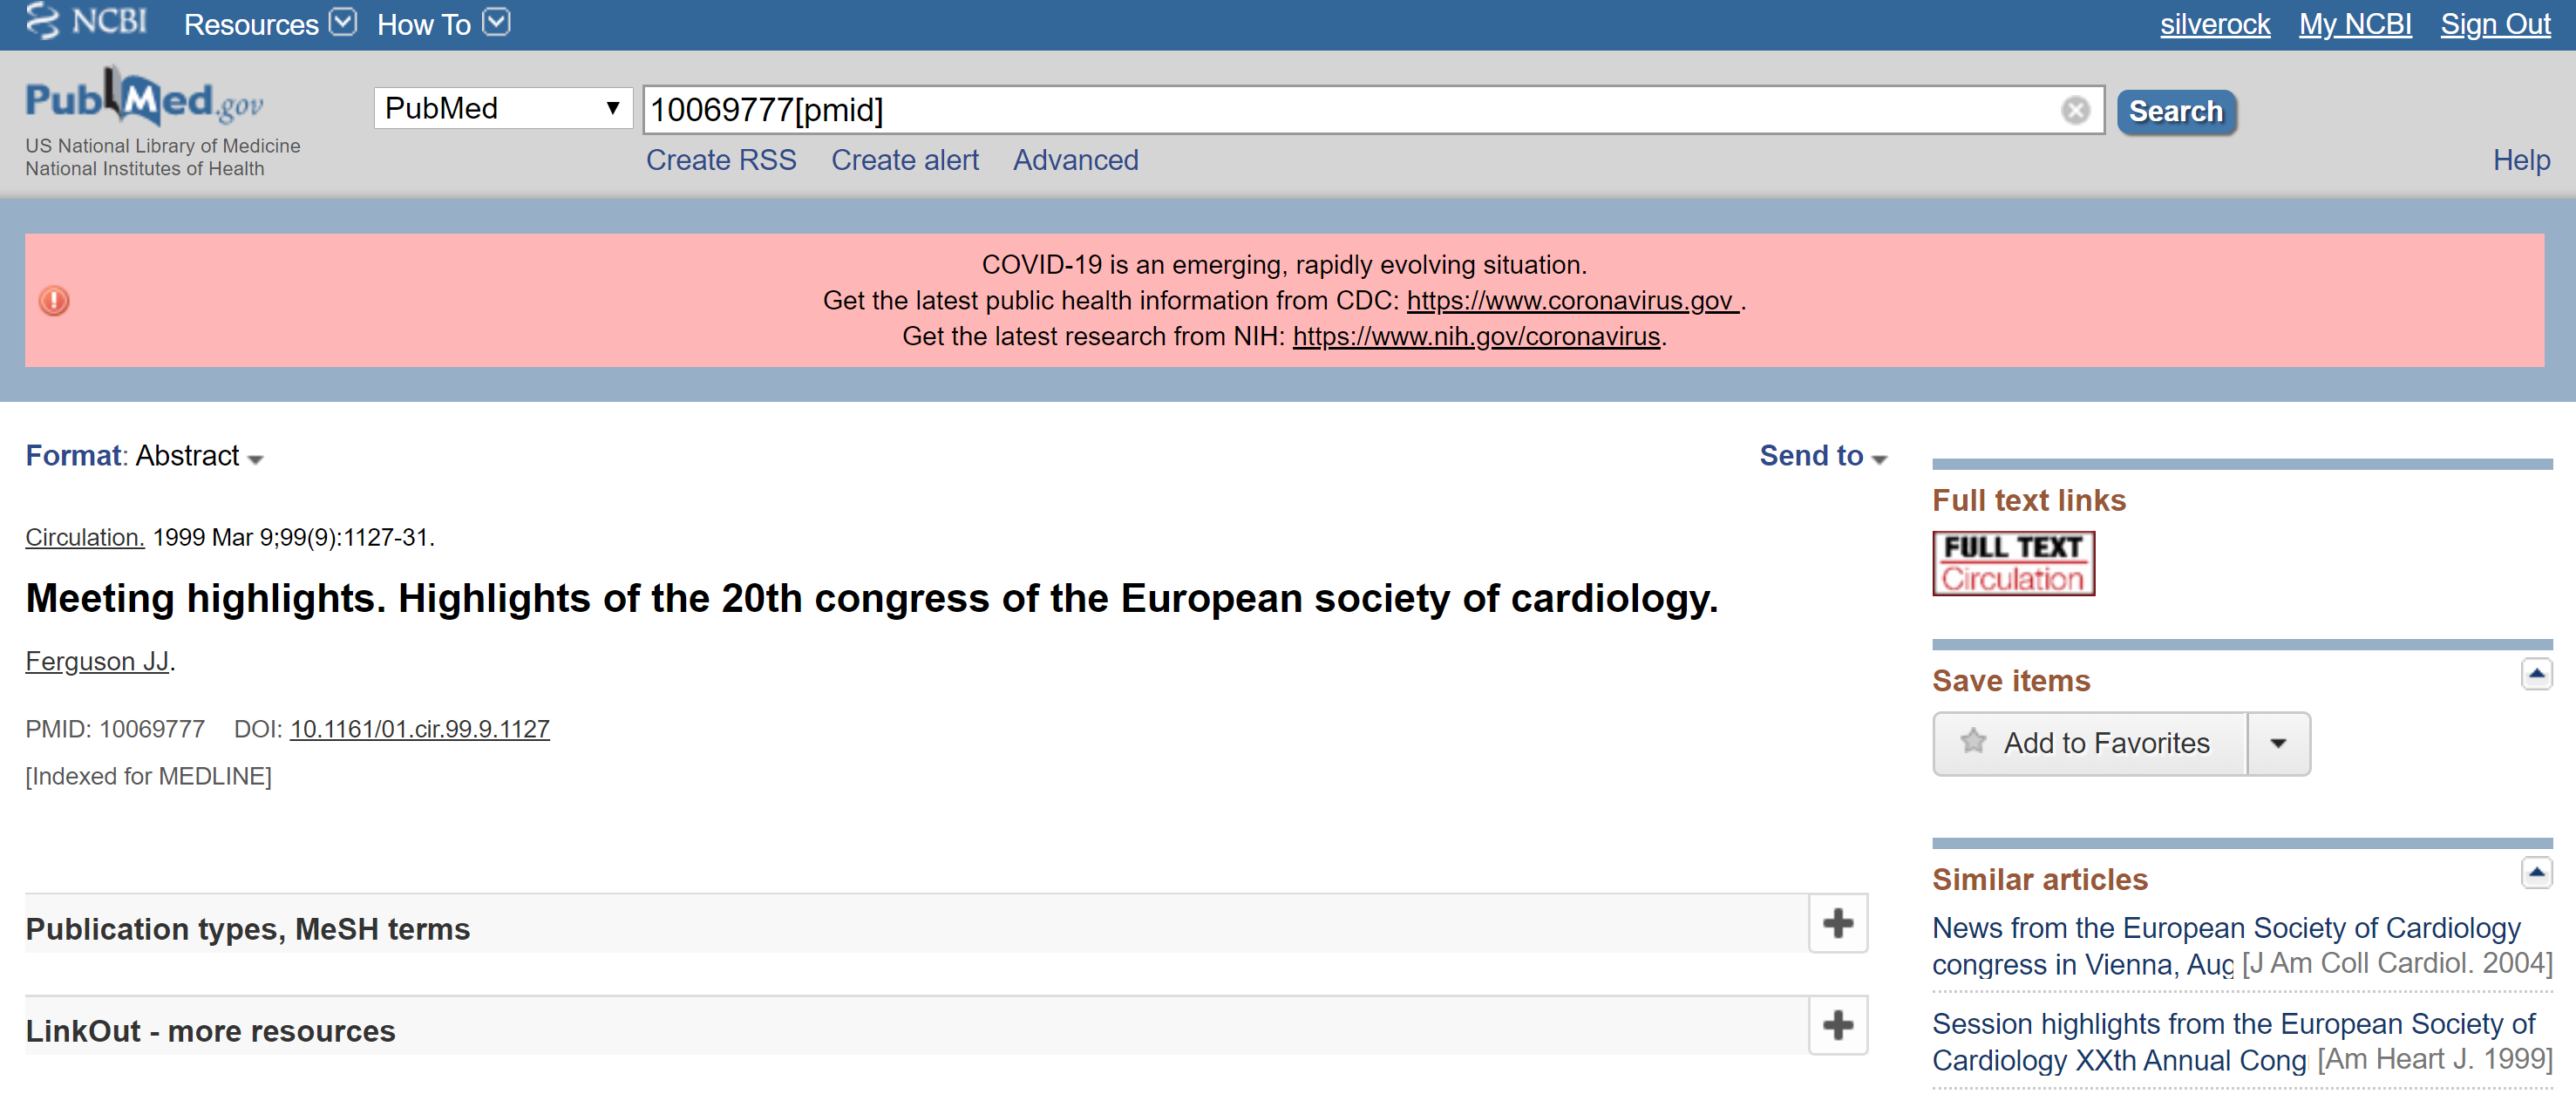

You can locate rows and columns with specific values using a `loc` command.  
Let's find a row corresponding to the PMID 8041685

In [73]:
df.loc[df['pmid']=='8041685']

,topic,pmid,decision,abstract
9999,Opiods,8041685,E,Diagnosis of myofascial pain syndrome may beco...


---------------
### <font color=blue> Exercise 4 <font>
  
Find rows whose topic is 'BetaBlockers' and triage decision is 'include' but abstract information is not available.  


When you take a close look at the data, you will notice that there are some articles whose 'decision' codes are integers

In [74]:
df.loc[(df['topic']=='BetaBlockers') & (df['decision']=='5')].head()

,topic,pmid,decision,abstract
4953,BetaBlockers,10466460,5,The aim of this study was to determine whether...
5019,BetaBlockers,10666349,5,NaN
5066,BetaBlockers,10760544,5,The variability in the individual response to ...
5068,BetaBlockers,10776828,5,For some time the medical treatment of glaucom...
5096,BetaBlockers,10839554,5,The recommendation for first-line therapy for ...


According to the description of dataset (https://dmice.ohsu.edu/cohenaa/systematic-drug-class-review-data.html), the integer codes indicate reasons for exclusion. Therefore we can categorize the integer codes to 'E' in the 'decision column.  
  
`replace(self,to_replace)` function replaces `self` values with `to_replace` values in a dataframe.

In [75]:
df['decision'] = df['decision'].replace(['1','2','3','4','5','6','7','8','9'],'E')

df.head()

,topic,pmid,decision,abstract
0,ACEInhibitors,10024335,E,Hypercholesterolemia and hypertension are freq...
1,ACEInhibitors,10027665,E,To implement and measure the effects of automa...
2,ACEInhibitors,10027935,E,In patients with insulin-dependent diabetes me...
3,ACEInhibitors,10028936,E,Aortic root flow and pressure estimates were o...
4,ACEInhibitors,10029645,I,Population-based studies have found that black...


We, now, have a neatly formatted dataset of articles and you can quickly check the total number of  articles with the following code.

In [76]:
df.topic.value_counts()

ACEInhibitors             2544
BetaBlockers              2072
CalciumChannelBlockers    1218
Opiods                    1124
AtypicalAntipsychotics    1120
ADHD                       851
NSAIDS                     393
Estrogens                  368
Antihistamines             310
Name: topic, dtype: int64

# Lesson 2 &ndash; Text Data Wrangling & Processing

Credit: https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72

Now that we have created data sets that have texts and the topics, we need to preprocess our text data before we convert it to something useful (i.e. numbers) for the machine learning model.  

**Note**: You don't need to learn about all the details about the codes written here in Lesson 2. You can just use the codes in the this Lesson for future references

The raw texts in the 'abstract' column need to be cleaned to represent each word in the text correctly. 

To to this, first download and install Natural Language Toolkit (NLTK).  
NLTK is a commonly used tool in Python to conduct the text analysis. It is an open source library in Python, and has support for most NLP tasks. It also provides access to numerous text corpora.  
  
To install nltk, a `pip install nltk` or a `conda install nltk` should suffice.

In [77]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [78]:
import nltk

----------------
## Expanding Contractions

Contractions are shortened version of words or syllables. They often exist in either written or spoken forms in the English language. These shortened versions or contractions of words are created by removing specific letters and sounds. In case of English contractions, they are often created by removing one of the vowels from the word. Examples would be, **do not** to **don’t** and **I would** to **I’d**. Converting each contraction to its expanded, original form helps with text standardization.

**Note**: "contractions" package is not a standard python module. We leverage a standard set of contractions available in the contractions.py created by Dipanjan Sarkar. Please copy and paste below to create a new py file **contractions.py** and add it in the same directory you run your code from, else it will not work.

In [79]:
from contractions import CONTRACTION_MAP
import re

In [80]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

Let's test if this works

In [81]:
expand_contractions("Y'all can't expand contractions I'd think")

'You all cannot expand contractions I would think'

We can see how our function helps expand the contractions from the preceding output.

--------------
## Removing Special Characters

Special characters and symbols are usually non-alphanumeric characters or even occasionally numeric characters (depending on the problem), which add to the extra noise in unstructured text. Usually, simple regular expressions (regexes) can be used to remove them.  
  
(Please refer to "RegEx" appendix at the bottom of this notebook if you want to learn more about regexes)

In [82]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [83]:
remove_special_characters("Well this was fun! What do you think? 123#@!", 
                          remove_digits=True)

'Well this was fun What do you think '

----------------
## Stemming

Word stems are also known as the base form of a word, and we can create new words by attaching affixes to them in a process known as inflection. The goal of stemming is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. Stemming process maps all inflectional forms of a word to the same root form. Consider the word ***compute***. You can add affixes to it and form new words like ***computes, computed***, and ***computing***. In this case, the base word ***comput*** is the word stem.  
  
But how about the word ***king***? Is its base form ***k***?
  
The reverse process of obtaining the base form of a word from its inflected form is known as **stemming**. Stemming helps us in standardizing words to their base or root stem, irrespective of their inflections, which helps many applications like classifying or clustering text, and even in information retrieval.  
  
Let’s see the popular Porter stemmer in action now.  
Porter stemmer, or Porter's algorithm, is a rule-based suffix stripping algorithm. For example, the word ***duplicatable*** is stemmed by the following steps:
1. ***duplicatable*** to ***duplicat*** by a rule from step 4.
2. ***duplicat*** to ***duplicate*** by a rule from step 1b1.
3. ***duplicate*** to ***duplic*** by a rule from step 3.
4. [Stop]  
  
Porter stemmer is known for its simplicity and speed. 

In [84]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

In [85]:
simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'My system keep crash hi crash yesterday, our crash daili'

---------------
## Lemmatization

Lemmatization is very similar to stemming, where we remove word affixes to get to the base form of a word. However, the base form in this case is known as the root word, but not the root stem. The difference being that the root word is always a lexicographically correct word (present in the dictionary), but the root stem may not be so. Thus, root word, also known as the lemma, will always be present in the dictionary.  
For example, “am, are, is” will be lemmatized into “be”; “ car, car’s, cars’, cars” into “car”. After the process of lemmatization, the importance of some specific words will be enhanced.  

In [86]:
from nltk.stem import WordNetLemmatizer

In [87]:
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    s = " "
    t_l = []
    t_w = nltk.word_tokenize(text)
    for w in t_w:
        l_w = wordnet_lemmatizer.lemmatize(w, pos="v")
        t_l.append(l_w)
    text = s.join(t_l)
    return text

In [88]:
lemmatize_text("My system keeps crashing! his was crashed yesterday, ours crashes daily")

'My system keep crash ! his be crash yesterday , ours crash daily'

-------------
## Removing Stop Words

Words which have little or no significance, especially when constructing meaningful features from text, are known as stopwords or stop words. These are usually words that end up having the maximum frequency if you do a simple term or word frequency in a corpus. Typically, these can be articles, conjunctions, prepositions and so on. Some examples of stopwords are ***a, an, the, and*** the like.  
  
There is no universal stopword list, but we use a standard English language stopwords list from `nltk`.

In [89]:
from nltk.tokenize.toktok import ToktokTokenizer

In [91]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no') # we will not remove 'no' from stopword list
stopword_list.remove('not') # we will not reove 'not' from stopword list

In [92]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [93]:
remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer not'

---------------
## Building a Text Normalizer

Let’s now bring everything we learnt together and chain these operations to build a text normalizer to pre-process text data.

In [94]:
def normalize_corpus(corpus, contraction_expansion=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

Not let's put this function in action!. We will create a new column `clean_abs` to hold pre-processed text of abstract.

In [95]:
df['clean_abs'] = normalize_corpus(df['abstract'])
norm_corpus = list(df['clean_abs'])

In [96]:
df.head()

,topic,pmid,decision,abstract,clean_abs
0,ACEInhibitors,10024335,E,Hypercholesterolemia and hypertension are freq...,hypercholesterolemia hypertension frequently a...
1,ACEInhibitors,10027665,E,To implement and measure the effects of automa...,implement measure effect automatic computerize...
2,ACEInhibitors,10027935,E,In patients with insulin-dependent diabetes me...,patients insulindependent diabetes mellitus id...
3,ACEInhibitors,10028936,E,Aortic root flow and pressure estimates were o...,aortic root flow pressure estimate obtain noni...
4,ACEInhibitors,10029645,I,Population-based studies have found that black...,populationbased study find black patients cong...


In the clean_abs column, all the text is in lowercase and there are also no punctuation marks, no stopwords, and no contractions. Our text cleaning has worked like a charm.  

Let's take a look at the first row of 'abstract' and 'clean_abs' columns and transform them in a dictionary form.

In [97]:
# to_dict() function transforms row dataframe into a dictionary
df.iloc[0][['abstract','clean_abs']].to_dict()

{'abstract': 'Hypercholesterolemia and hypertension are frequently associated with elevated sympathetic activity. Both are independent cardiovascular risk factors and both affect endothelium-mediated vasodilation. To identify the effects of cholesterol-lowering and antihypertensive treatments on vascular reactivity and vasodilative capacity, we studied 30 hypercholesterolemic hypertensive subjects. They received placebo for 4 weeks, either enalapril or simvastatin for 14 weeks, and, finally, both medications for an additional 14 weeks. Postischemic forearm blood flow (MFBF) and minimal vascular resistance (mFVR) were used as indices of vasodilative capacity and structural vascular damage, respectively. Total (resting-stress-recovery phases) cardiovascular (blood pressure [BP] and heart rate [HR]) and regional hemodynamic (FBF and FVR) reactivity to stressful stimuli were calculated as area-under-the-curve (auc) (valuextime). Compared with baseline levels, simvastatin reduced total (TOT

-------------
# Lesson 3 &ndash; Exploratory Data Analysis


In this module, we will talk about the exploratory analysis of text.

In order to run the examples in this module, you will first need to run the code in the cell below.  These lines of code import the objects and libraries needed for text mining.  
  
Credit: https://medium.com/natural-language-processing-machine-learning/nlp-for-beginners-how-simple-machine-learning-model-compete-with-the-complex-neural-network-on-b9f7f93c79e6?source=bookmarks---------2-----------------------  
  
In this module, we will play with articles whose topics are "ACEIs" only.

In [100]:
# copy rows whose topics are 'ACEInhibitors'
df_acei = df.loc[(df['topic']=='ACEInhibitors')].copy() 

# Delete rows whose abstract texts are absent
droprow = df_acei['abstract'].isin(['NaN']) # .isin() function searches rows that contain the argument
df_acei = df_acei[~droprow] # '~' means 'without'

In [101]:
df_acei.head()

,topic,pmid,decision,abstract,clean_abs
0,ACEInhibitors,10024335,E,Hypercholesterolemia and hypertension are freq...,hypercholesterolemia hypertension frequently a...
1,ACEInhibitors,10027665,E,To implement and measure the effects of automa...,implement measure effect automatic computerize...
2,ACEInhibitors,10027935,E,In patients with insulin-dependent diabetes me...,patients insulindependent diabetes mellitus id...
3,ACEInhibitors,10028936,E,Aortic root flow and pressure estimates were o...,aortic root flow pressure estimate obtain noni...
4,ACEInhibitors,10029645,I,Population-based studies have found that black...,populationbased study find black patients cong...


--------------
## Distribution of target class  

The 'acei_data' is cleaned up to contain articles whose abstract texts are available.  
Now let's take a look at the distribution of 'included' and 'excluded' articles in the 'acei_data.'

`groupby(axis)` function splits the data according to the axis.  
`agg({axis:operator})` function aggregates values by axis and returns results calculated by operator
  
The output from a groupby and aggregation operation varies between Pandas Series and Pandas Dataframes, which can be confusing for new users. As a rule of thumb, if you calculate more than one column of results, your result will be a Dataframe. For a single column of results, the agg function, by default, will produce a Series.  

The following code returns the 'count' of 'decisions' aggregated by 'decision'

In [105]:
p_n = acei_data.groupby('decision').agg({'decision':'count'})
p_n

,decision
decision,
E,2067
I,168


To visualize this table,

In [107]:
import matplotlib.pyplot as plt

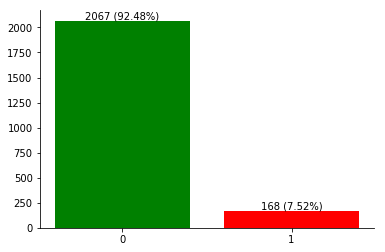

In [108]:
bars = plt.bar(range(2),p_n.decision,color='gr')
plt.xticks([0,1])
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x()+bar.get_width() / 2, h,str(h)+' (%.2f%%)' % (h/len(acei_data)*100) , ha='center', va='bottom')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

-------------------
## Frequencies — bar chart  
  
credit: https://medium.com/analytics-vidhya/predicting-movie-genres-using-nlp-46d70b97c67d  
  
There are different ways to count the frequencies of each word (token). The function below will visualize the words and their frequency in a set of documents. Let’s use it to find out the most frequent words in the clean_abs column:  
  
To do this, let's go back to our original dataset 'df', which includes all topics.

In [117]:
from nltk.probability import FreqDist
from nltk.util import ngrams
import seaborn as sns

In [118]:
def freq_words(x, terms = 30): 
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
    # selecting top 30 most frequent words 
    d = words_df.nlargest(columns="count", n = terms) 
  
    # visualize words and frequencies
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 
    plt.show()

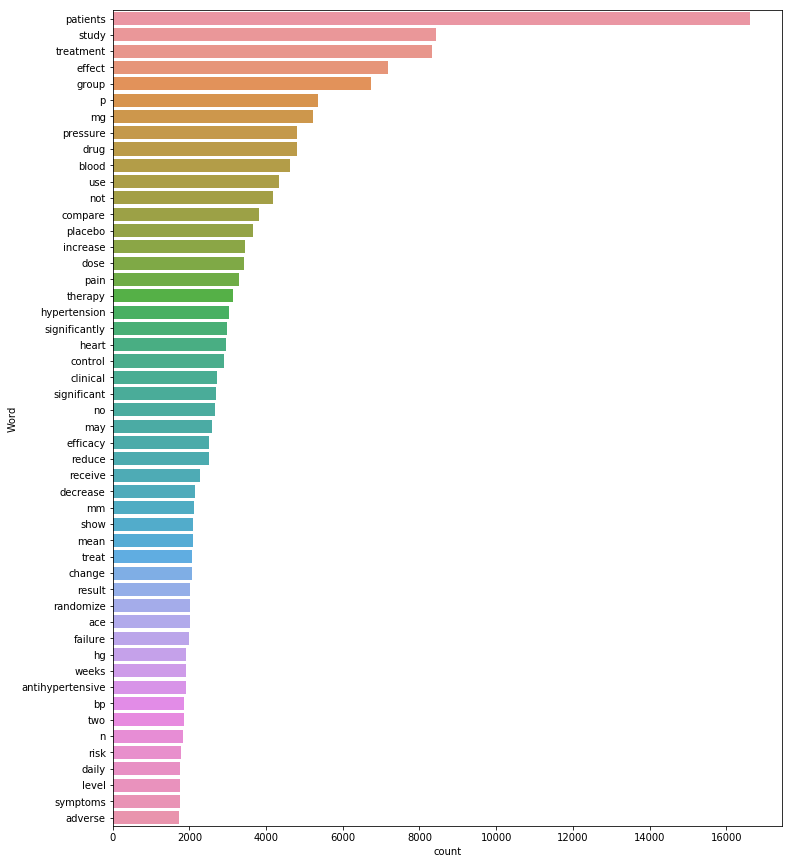

In [126]:
freq_words(df['clean_abs'], 50)

Is there any difference in word frequency between articles whose topics are 'ACEIhibitors' and 'ADHD'?

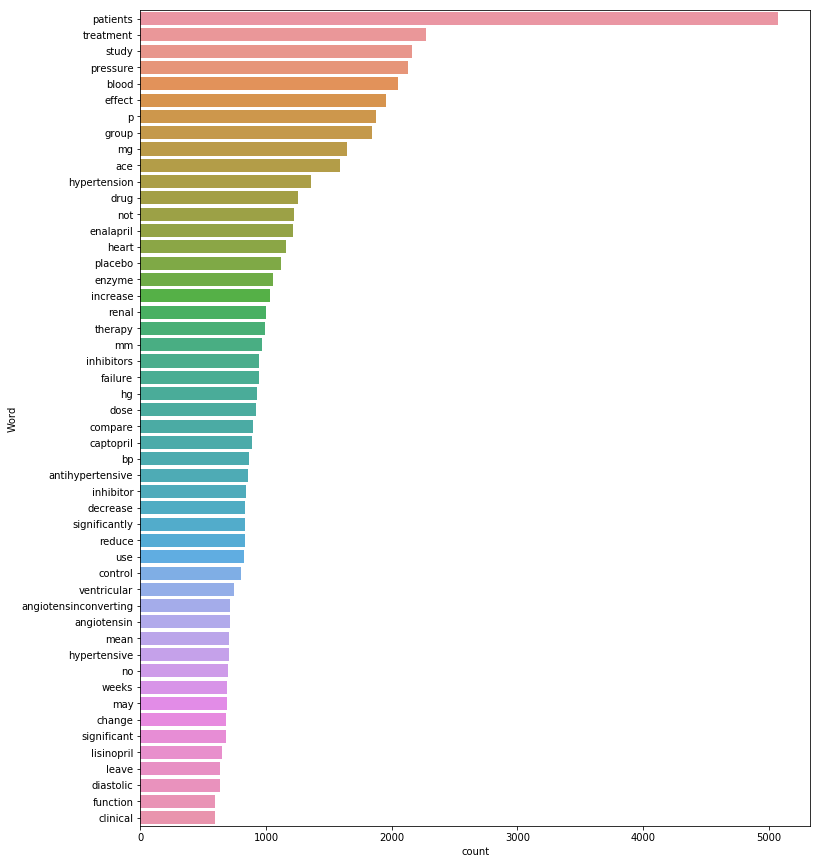

In [124]:
freq_words(df['clean_abs'][df['topic']=='ACEInhibitors'], 50)

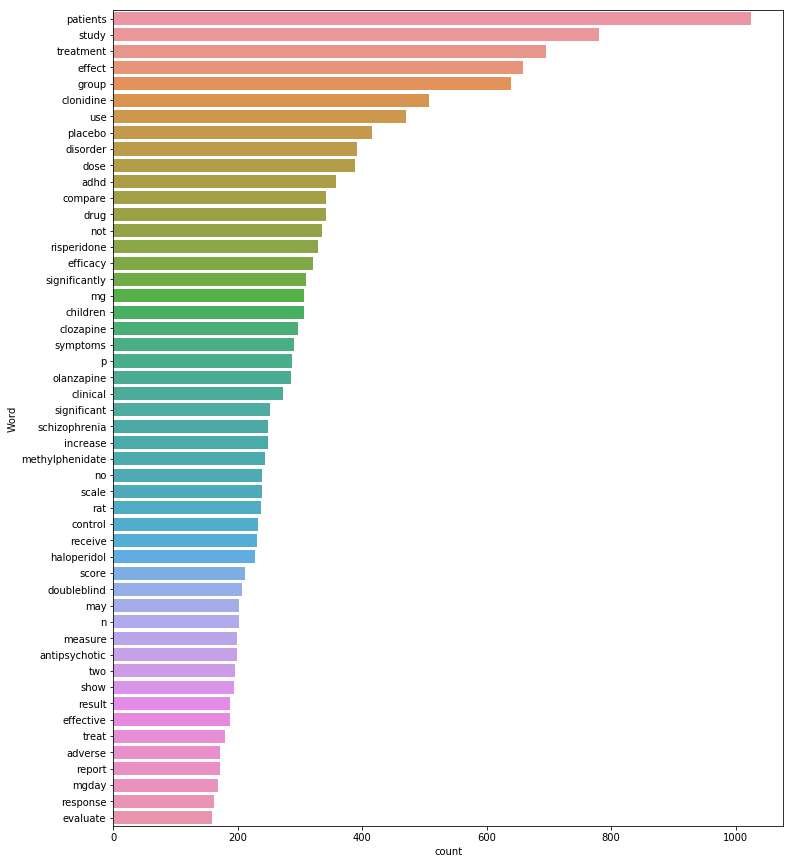

In [125]:
freq_words(df['clean_abs'][df['topic']=='ADHD'], 50)

The top frequency words look similar between the two topics, but as you read though the bars, we will notice that topic-specific words come up. In 'ACEIhibitors' articles, there are 'pressure,' 'blood,' 'hypertension,' and 'heart,' while in 'ADHD' articles there are 'children,' and 'schizophrenia.' From this, you will deduce that ACE inhibitors are drugs that works for cardiovascular system, and ADHD is a psychiatric disease frequent in children.

# Lesson 4 &ndash; Parts of Speech Tagging

# Lesson 5 &ndash; Feature Representation

# Lesson 6 &ndash; Predictive Analysis

## Model Selection

# DTM

## Logistic Regression

## Naive Bayes

In [ ]:
import pandas as pd
 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

#instantiate CountVectorizer()
cv=CountVectorizer()
 
# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(abstract_cl)

In [ ]:
word_count_vector.shape # returns 7838 unique words

## Chi-Square represented by DTM

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from scipy import interp
from sklearn.metrics import roc_curve,auc 

### Accuracy - DTM

In [ ]:
# 4-fold cross-validation model
clf = LogisticRegression()

kfold = KFold(n_splits=4, random_state=10, shuffle=False)

veczr = CountVectorizer(max_features=90000, ngram_range=(1,3))
x_dtm = veczr.fit_transform(abstract_cl)
target= data['Inclusion'].values.astype(str)

ch2 = SelectKBest(chi2, k=90000)

ch2_result_dtm = []
for n in np.arange(1000,90000,1000):
    ch2 = SelectKBest(chi2, k=n)
    for train_index,test_index in kfold.split(x_dtm,target):
        x_train_dtm, x_test_dtm = x_dtm[train_index], x_dtm[test_index]
        y_train_dtm, y_test_dtm = target[train_index], target[test_index]
        x_train_chi2_selected_dtm = ch2.fit_transform(x_train_dtm, y_train_dtm)
        x_test_chi2_selected_dtm = ch2.transform(x_test_dtm)
        clf.fit(x_train_chi2_selected_dtm, y_train_dtm)
        score = clf.score(x_test_chi2_selected_dtm, y_test_dtm)
    mean_score = score.mean()
    ch2_result_dtm.append(mean_score)
    
print(ch2_result_dtm)
max_dtm = max(ch2_result_dtm)
print("Mean Accuracy of DTM Model:",max_dtm)

In [ ]:
plt.figure(figsize=(8,6))
#plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(np.arange(1000,90000,1000),ch2_result_dtm, color='orangered')

plt.title("Features represented by DTM within reduced dimensions with chi2")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy of logistic regression model")

In [ ]:
print(ch2_result_dtm)

### AUC - DTM

In [ ]:
# AUC
tprs_dtm = []
aucs_dtm = []
mean_fpr_dtm = np.linspace(0,1,100)
#i = 1
for train_index,test_index in kfold.split(x_dtm,target):
    x_train_dtm, x_test_dtm = x_dtm[train_index], x_dtm[test_index]
    y_train_dtm, y_test_dtm = target[train_index], target[test_index]
    prediction_dtm = clf.fit(x_train_dtm,y_train_dtm).predict_proba(x_test_dtm)
    fpr_dtm, tpr_dtm, t_dtm = roc_curve(y_test_dtm, prediction_dtm[:, 1], pos_label='1')
    tprs_dtm.append(interp(mean_fpr_dtm, fpr_dtm, tpr_dtm))
    roc_auc_dtm = auc(fpr_dtm, tpr_dtm)
    aucs_dtm.append(roc_auc_dtm)

mean_tpr_dtm = np.mean(tprs_dtm, axis=0)
mean_auc_dtm = auc(mean_fpr_dtm, mean_tpr_dtm)
print('Final AUC of DTM Model:', mean_auc_dtm)

## Chi-Square represented by TF-IDF

credit: https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-8-dimensionality-reduction-chi2-pca-c6d06fb3fcf3

### Accuracy - TF-IDF

In [ ]:
# 4-fold cross-validation model
clf = LogisticRegression()

kfold = KFold(n_splits=4, random_state=10, shuffle=False)

tvec = TfidfVectorizer(max_features=90000,ngram_range=(1,3))
x_tf = tvec.fit_transform(abstract_cl)

ch2 = SelectKBest(chi2, k=90000)

ch2_result_tf = []

for n in np.arange(1000,90000,1000):
    ch2 = SelectKBest(chi2, k=n)
    for train_index,test_index in kfold.split(x_tf,target):
        x_train_tf, x_test_tf = x_tf[train_index], x_tf[test_index]
        y_train_tf, y_test_tf = target[train_index], target[test_index]
        x_train_chi2_selected_tf = ch2.fit_transform(x_train_tf, y_train_tf)
        x_test_chi2_selected_tf = ch2.transform(x_test_tf)
        clf.fit(x_train_chi2_selected_tf, y_train_tf)
        score = clf.score(x_test_chi2_selected_tf, y_test_tf)
    mean_score_tf = score.mean()
    ch2_result_tf.append(mean_score_tf)
    
print(ch2_result_tf)
max_tf = max(ch2_result_tf)
print("Mean Accuracy of TF-IDF Model:",max_tf)

### AUC - TF-IDF

In [ ]:
# AUC
tprs_tf = []
aucs_tf = []
mean_fpr_tf = np.linspace(0,1,100)
#i = 1
for train_index,test_index in kfold.split(x_tf,target):
    x_train_tf, x_test_tf = x_tf[train_index], x_tf[test_index]
    y_train_tf, y_test_tf = target[train_index], target[test_index]
    prediction_tf = clf.fit(x_train_tf,y_train_tf).predict_proba(x_test_tf)
    fpr_tf, tpr_tf, t_tf = roc_curve(y_test_tf, prediction_tf[:, 1], pos_label='1')
    tprs_tf.append(interp(mean_fpr_tf, fpr_tf, tpr_tf))
    roc_auc_tf = auc(fpr_tf, tpr_tf)
    aucs_tf.append(roc_auc_tf)

mean_tpr_tf = np.mean(tprs_tf, axis=0)
mean_auc_tf = auc(mean_fpr_tf, mean_tpr_tf)
print('Mean AUC of TF-IDF Model:', mean_auc_tf)

# Concluding Visualization

In [ ]:
models = []
accuracies = []

models.append('DTM')
accuracies.append(max_dtm)

models.append('TF-IDF')
accuracies.append(max_tf)


accuracy_models = pd.DataFrame({'Models': models, 'Accuracy': accuracies})
#final_models_auc_sorted = final_models_auc.sort_values('Accuracy', ascending=False)
print(accuracy_models)

In [ ]:
# Plot bar graph of final Accuracy
import seaborn as sns

axis = sns.barplot(x = 'Models', y = 'Accuracy', data = accuracy_models)
axis.set(xlabel = 'Feature Representation', ylabel = 'Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha='center')
#plt.bar(6, height, color = ('blue','green','red','cyan','magenta','yellow','black'))
#plt.ylim([0.0, 1.0])
plt.show()

In [ ]:
# ROC Curve
# Credit: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html


'''
random_state = np.random.RandomState(0)
cv = StratifiedKFold(n_splits=10,shuffle=False)
'''

# plot arrows
#fig1 = plt.figure(figsize=[8,8])
#ax1 = fig1.add_subplot(111,aspect = 'equal')
#ax1.add_patch(patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5))
#ax1.add_patch(patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)

mean_tpr_dtm = np.mean(tprs_dtm, axis=0)
mean_tpr_tf = np.mean(tprs_tf, axis=0)
mean_auc_dtm = auc(mean_fpr_dtm, mean_tpr_dtm)
mean_auc_tf = auc(mean_fpr_tf, mean_tpr_tf)

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')

plt.plot(mean_fpr_dtm, mean_tpr_dtm, color='blue',
         label=r'DTM Model (AUC = %0.4f)'%mean_auc_dtm,lw=2, alpha=0.75)

plt.plot(mean_fpr_tf, mean_tpr_tf, color='red',
         label=r'TF-IDF Model (AUC = %0.4f)'%mean_auc_tf,lw=2, alpha=0.75)

plt.ylim(0,1)
plt.xlim(0,1)
plt.xlabel('False Positive Rate (1-specificity)', fontsize = 12)
plt.ylabel('True Positive Rate (sensitivity)', fontsize = 12)
# plt.title('Mean ROC Curve for Classifiers', fontsize = 16)
plt.legend(loc="lower right", fontsize = 8, title = 'Mean ROC of')
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.grid(True)
plt.show()

## TF-IDF Using Vectorizer

credit: https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/

In [ ]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

In [ ]:
# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights'], ascending=False).head(10)

In [ ]:
# count matrix
count_vector=cv.transform(abstract_cl)
 
# tf-idf scores
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [ ]:
# tfidf of first document

feature_names = cv.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=tf_idf_vector[0]
 
#print the scores

#df = pd.DataFrame(first_document_vector.T.todense())
#df.columns = ['feature','tfidf']
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df['Features'] = df.index
df.sort_values(by=["tfidf"],ascending=False).head(10)

In [ ]:
df.loc[df["Features"] == "system"]

# Error Analysis

In [ ]:
x_train, x_validation, y_train, y_validation = train_test_split(abstract_cl, target, test_size = 0.25)
ch2 = SelectKBest(chi2, k=80000)

x_train_dtm = veczr.fit_transform(x_train)
x_validation_dtm = veczr.transform(x_validation)
x_train_chi2_selected_dtm = ch2.fit_transform(x_train_dtm, y_train)
x_validation_chi2_selected_dtm = ch2.transform(x_validation_dtm)
prediction_dtm = clf.fit(x_train_chi2_selected_dtm,y_train).predict_proba(x_validation_chi2_selected_dtm)
y_pred_prob_dtm = clf.predict_proba(x_validation_chi2_selected_dtm)[:,1]

tvec = TfidfVectorizer(max_features=90000,ngram_range=(1,3))
x_train_tf = tvec.fit_transform(x_train)
x_validation_tf = tvec.transform(x_validation)
x_train_chi2_selected_tf = ch2.fit_transform(x_train_tf, y_train)
x_validation_chi2_selected_tf = ch2.transform(x_validation_tf)
prediction_tf = clf.fit(x_train_chi2_selected_tf,y_train).predict_proba(x_validation_chi2_selected_tf)
y_pred_prob_tf = clf.predict_proba(x_validation_chi2_selected_tf)[:,1]

fpr_dtm, tpr_dtm, thresholds_dtm = roc_curve(y_validation, y_pred_prob_dtm, pos_label='1')
fpr_tf, tpr_tf, thresholds_tf = roc_curve(y_validation, y_pred_prob_tf, pos_label='1')

In [ ]:
def evaluate_threshold_dtm(threshold):
    print("Sensitivity: ", tpr_dtm[thresholds_dtm > threshold][-1])
    print("Specificity: ", 1 - fpr_dtm[thresholds_dtm > threshold][-1])
    
def evaluate_threshold_tf(threshold):
    print("Sensitivity: ", tpr_tf[thresholds_tf > threshold][-1])
    print("Specificity: ", 1 - fpr_tf[thresholds_tf > threshold][-1])

In [ ]:
evaluate_threshold_dtm(0.1217)

In [ ]:
evaluate_threshold_tf(0.3335)

## evaluate_threshold

In [ ]:
from sklearn.preprocessing import binarize
from sklearn import metrics
y_pred_class_dtm = binarize([y_pred_prob_dtm], 0.1217)[0]
y_pred_class_tf = binarize([y_pred_prob_tf], 0.3335)[0]


In [ ]:
print(metrics.confusion_matrix(y_validation, y_pred_class_dtm)) 

In [ ]:
print(metrics.confusion_matrix(y_validation, y_pred_class_tf)) 

In [ ]:
data_dtm = pd.DataFrame({'text' : pd.Series(x_validation), 'label' : pd.Series(y_validation),
                     'prob': pd.Series(y_pred_prob_dtm), 'pred_label': pd.Series(y_pred_class_dtm)})
#data
#data.sort_values('prob', axis=0, ascending=False)
data_dtm[1:10]

In [ ]:
data_tf = pd.DataFrame({'text' : pd.Series(x_validation), 'label' : pd.Series(y_validation),
                     'prob': pd.Series(y_pred_prob_tf), 'pred_label': pd.Series(y_pred_class_tf)})
#data
#data.sort_values('prob', axis=0, ascending=False)
data_tf[1:10]

### False-negative cases

In [ ]:
data_dtm.loc[(data_dtm["label"] == 1) & (data_dtm["pred_label"]==0)]

In [ ]:
data_tf.loc[(data_tf["label"] == 1) & (data_tf["pred_label"]==0)]

#### 